# Employee exit surveys
#### Exploring relationships of tenure and age with dissatisfied employees

In [1]:
# import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import data with simple cleaning

dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete = dete.drop(dete.columns[28:49], axis=1)
tafe = pd.read_csv('tafe_survey.csv')
tafe = tafe.drop(tafe.columns[17:66], axis=1)


In [3]:
# investigate raw dete data

dete.info()
dete.head()
dete.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
# investigate raw tafe data

tafe.info()
tafe.head()
tafe.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
Contributing Factors. Ill Health                                             265
Contributing Factors. Maternity/Family                                       265
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
Contributing Factors. Interp

### the data looks really gross and im having trouble viewing it because Jupyter in this interface is difficult. But... there are hundreds of columns, several are irrelevant, all of them have different names between the two datasets. I'll have to manipulate it a ton before i can make any sense of it.

In [5]:
# first I will clean the column names in the dete data

dete.columns = dete.columns.str.lower().str.strip().str.replace(' ', '_')
dete.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [6]:
# renaming the column names in the tafe data

new_names = {'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe = tafe.rename(new_names, axis=1)
tafe.head()
dete.head()


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


now the columns to be analysed will have matching names

In [7]:
# investigating the separation type columns
# to isolate employees who resigned

print(dete['separationtype'].value_counts(),'\n')
print(tafe['separationtype'].value_counts())


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [8]:
# selecting only separation type == resignation

dete = dete[(dete['separationtype'] == 'Resignation-Other reasons') | (dete['separationtype'] == 'Resignation-Other employer') | (dete['separationtype'] == 'Resignation-Move overseas/interstate')].copy()
dete['separationtype'].value_counts()


Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [9]:
# selecting only separation type == resignation

tafe = tafe[tafe['separationtype'] == 'Resignation'].copy()
tafe['separationtype'].value_counts()


Resignation    340
Name: separationtype, dtype: int64

we are only interested in determining the relationships between employees resigning, so we will isolate data from employees who resigned

# Clean the cease date columns in both datasets

In [10]:
# print(dete['cease_date'].value_counts(dropna=False))
dete['cease_date'] = dete['cease_date'].str.split('/').str[-1]
dete['cease_date'] = dete['cease_date'].astype(float)
dete['cease_date'].value_counts(dropna=False)
print(dete.head())


    id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...  work_life_balanc

In [11]:
# print(tafe['cease_date'].value_counts(dropna=False))
tafe['cease_date'] = tafe['cease_date'].astype(float)
print(tafe['cease_date'].value_counts(dropna=False))


2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64


In [12]:
# cleaning dete start date data
dete['start_date'] = dete['dete_start_date']
dete_sd_vc = dete['start_date'].value_counts(dropna=False)
dete_sd_vc.sort_index()


1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: start_date, dtype: int64

In [13]:
"""

creating a new column in dete dataset (institute service)
to describe years of service and match tafe dataset 

"""

dete['institute_service'] = dete['cease_date'] - dete['start_date']
dete['institute_service'].value_counts(dropna=False).sort_index(ascending=False)


49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
NaN     38
Name: institute_service, dtype: int64

In [14]:
# investigating reasons employees resigned from tafe

print(tafe['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))


-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [15]:
# determining which employees were dissatisfied

# tafe dataset first

"""

this is a function to be applied to tafe columns
that reduce a reason why the employee left to a
to a simple True of False for employee disatisfaction

"""

def update_vals(cell):
    if cell == '-':
        return False
    elif pd.isnull(cell):
        return np.nan
    else:
        return True

tafe['dissatisfied'] = tafe[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe['dissatisfied'].value_counts(dropna=False)


False    241
True      99
Name: dissatisfied, dtype: int64

In [16]:
# dete


"""

this will reduce reasons an employee was disatisfied
to a simple True or False for employee disatisfaction

"""

dete['dissatisfied'] = dete[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(axis=1, skipna=False)
# dete['dissatisfied'].value_counts(dropna=False)


In [17]:
# normalize institute service

dete['institute_service'].describe()

def isn(cell):
    if cell < 3:
        return 'new'
    elif cell < 7:
        return 'experienced'
    elif cell < 11:
        return 'established'
    elif pd.isnull(cell):
        return np.nan
    else:
        return 'veteran'

dete['service_category'] = dete['institute_service'].apply(isn)
dete['service_category'].value_counts(dropna=False)


veteran        100
experienced     76
new             56
established     41
NaN             38
Name: service_category, dtype: int64

In [18]:
tafe['institute_service'].value_counts(dropna=False)

def isn(cell):
    if cell == 'Less than 1 year' or cell == '1-2':
        return 'new'
    elif cell == '3-4' or cell == '5-6':
        return 'experienced'
    elif cell == '7-10':
        return 'established'
    elif pd.isnull(cell):
        return np.nan
    else:
        return 'veteran'

tafe['service_category'] = tafe['institute_service'].apply(isn)
tafe['service_category'].value_counts(dropna=False)


new            137
experienced     96
NaN             50
veteran         36
established     21
Name: service_category, dtype: int64

In [19]:
# to distinguish dete from tafe after merging dataframes

dete['institute'] = 'DETE'
tafe['institute'] = 'TAFE'


In [20]:
# merge dete and tafe

combined = pd.concat([dete, tafe])
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [21]:
combined['dissatisfied'].value_counts(dropna=False)


False    403
True     248
Name: dissatisfied, dtype: int64

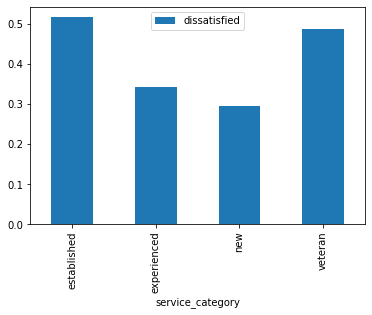

In [22]:
# Replace missing values with the most frequent value, False

combined['dissatisfied'] = combined['dissatisfied'].fillna(False)
cpvt = combined.pivot_table(index='service_category', values='dissatisfied', dropna=False)

# Plot the results

%matplotlib inline
cpvt.plot(kind='bar')
plt.show()


it appears that the longer an employee is with the company, the more likely they are to resign due to dissatisfaction with the employer

now to explore the relationship with age and dissatisfaction

In [23]:
# cleaning the age column

combined.info()
combined['age'] = combined['age'].str.replace('  ', '-').str.strip()

def combages(cell):
    if cell == '56-60' or cell == '61 or older':
        return '56 or older'
    else:
        return cell

combined['age'] = combined['age'].apply(combages)
combined['age'].value_counts(dropna=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
20 or younger    10
Name: age, dtype: int64

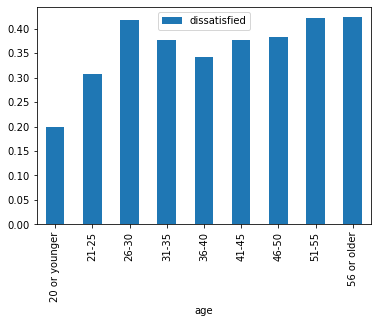

In [24]:
# group by age and plot dissatisfaction with employer

pvta = combined.pivot_table(index='age', values='dissatisfied', dropna=False)
pvta.plot(kind='bar')
plt.show()


# Conclusion:
Younger employees are more likely to resign for reasons other than being dissatisfied with the employer. This agrees with our first finding, that the older an employee is, or longer he has been with a company, the more likely they are to be disatisfied with the employer